In [128]:
%% Machine Learning Online Class - Exercise 4 Neural Network Learning

%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  linear exercise. You will need to complete the following functions 
%  in this exericse:
%
%     sigmoidGradient.m
%     randInitializeWeights.m
%     nnCostFunction.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

dir_material = /Users/elliottevers/Documents/git-repos.nosync/machine_learning/labs/5/machine-learning-ex4/ex4/
Loading and Visualizing Data ...


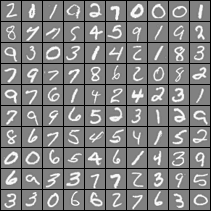

In [129]:
dir_material = '/Users/elliottevers/Documents/git-repos.nosync/machine_learning/labs/5/machine-learning-ex4/ex4/'
addpath(dir_material);

%% Setup the parameters you will use for this exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
hidden_layer_size = 25;   % 25 hidden units
num_labels = 10;          % 10 labels, from 1 to 10   
                          % (note that we have mapped "0" to label 10)

%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset. 
%  You will be working with a dataset that contains handwritten digits.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

load('ex4data1.mat');
m = size(X, 1);

% Randomly select 100 data points to display
sel = randperm(size(X, 1));
sel = sel(1:100);

displayData(X(sel, :));

% fprintf('Program paused. Press enter to continue.\n');
% pause;

In [130]:
%% ================ Part 2: Loading Parameters ================
% In this part of the exercise, we load some pre-initialized 
% neural network parameters.

fprintf('\nLoading Saved Neural Network Parameters ...\n')

% Load the weights into variables Theta1 and Theta2
load('ex4weights.mat');

% Unroll parameters 
nn_params = [Theta1(:) ; Theta2(:)];

%% ================ Part 3: Compute Cost (Feedforward) ================
%  To the neural network, you should first start by implementing the
%  feedforward part of the neural network that returns the cost only. You
%  should complete the code in nnCostFunction.m to return cost. After
%  implementing the feedforward to compute the cost, you can verify that
%  your implementation is correct by verifying that you get the same cost
%  as us for the fixed debugging parameters.
%
%  We suggest implementing the feedforward cost *without* regularization
%  first so that it will be easier for you to debug. Later, in part 4, you
%  will get to implement the regularized cost.
%
fprintf('\nFeedforward Using Neural Network ...\n')

% Weight regularization parameter (we set this to 0 here).
lambda = 0;


Loading Saved Neural Network Parameters ...

Feedforward Using Neural Network ...


In [173]:
function [J grad] = nnCostFunction(nn_params, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   num_labels, ...
                                   X, y, lambda)
%NNCOSTFUNCTION Implements the neural network cost function for a two layer
%neural network which performs classification
%   [J grad] = NNCOSTFUNCTON(nn_params, hidden_layer_size, num_labels, ...
%   X, y, lambda) computes the cost and gradient of the neural network. The
%   parameters for the neural network are "unrolled" into the vector
%   nn_params and need to be converted back into the weight matrices. 
% 
%   The returned parameter grad should be a "unrolled" vector of the
%   partial derivatives of the neural network.
%

% Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
% for our 2 layer neural network
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));

% Setup some useful variables
m = size(X, 1);
         
% You need to return the following variables correctly 
J = 0;
Theta1_grad = zeros(size(Theta1));
Theta2_grad = zeros(size(Theta2));

% ====================== YOUR CODE HERE ======================
% Instructions: You should complete the code by working through the
%               following parts.
%
% Part 1: Feedforward the neural network and return the cost in the
%         variable J. After implementing Part 1, you can verify that your
%         cost function computation is correct by verifying the cost
%         computed in ex4.m
%
% Part 2: Implement the backpropagation algorithm to compute the gradients
%         Theta1_grad and Theta2_grad. You should return the partial derivatives of
%         the cost function with respect to Theta1 and Theta2 in Theta1_grad and
%         Theta2_grad, respectively. After implementing Part 2, you can check
%         that your implementation is correct by running checkNNGradients
%
%         Note: The vector y passed into the function is a vector of labels
%               containing values from 1..K. You need to map this vector into a 
%               binary vector of 1's and 0's to be used with the neural network
%               cost function.
%
%         Hint: We recommend implementing backpropagation using a for-loop
%               over the training examples if you are implementing it for the 
%               first time.
%
% Part 3: Implement regularization with the cost function and gradients.
%
%         Hint: You can implement this around the code for
%               backpropagation. That is, you can compute the gradients for
%               the regularization separately and then add them to Theta1_grad
%               and Theta2_grad from Part 2.
%



% Part 1: Feedforward the neural network and return the cost in the
%         variable J. After implementing Part 1, you can verify that your
%         cost function computation is correct by verifying the cost
%         computed in ex4.m


% feed forward to get final hypothesis
bias = ones(size(X,1), 1);

input_layer = [bias X];

second_layer = sigmoid(input_layer * Theta1');

output_layer = sigmoid([bias second_layer] * Theta2');

y_vec = zeros(size(X, 1), num_labels);

for i=1:size(X, 1)
  y_vec(i,y(i))=1;
end

J = (1/m) * sum(
    sum(
        (-y_vec) .* log(output_layer) - (1-y_vec) .* log(1-output_layer)
    )
);

Theta1_without_bias = Theta1(:,2:size(Theta1,2));

Theta2_without_bias = Theta2(:,2:size(Theta2,2));

term_reg = (lambda/(2*m))  * (
    sum(sum(Theta1_without_bias .^ 2 )) + sum(sum(Theta2_without_bias .^ 2 ))
);

J = J + term_reg;

for t=1:m
    bias = ones(size(X(t, :),1), 1);

    input_layer_activations_with_bias = [bias X(t, :)];

    second_layer_activations = sigmoid(input_layer_activations_with_bias * Theta1');

    output_layer_activations = sigmoid([bias second_layer_activations] * Theta2');

    y_vec = zeros(size(X, 1), num_labels);

    for i=1:size(X, 1)
      y_vec(i,y(i))=1;
    end

    delta_3 = output_layer_activations - y_vec(t, :);

    second_layer_activations_with_bias =[1; second_layer_activations'];

    delta_2 = (Theta2' * delta_3') .* sigmoidGradient(second_layer_activations_with_bias);

    Theta2_grad = Theta2_grad + delta_3' * second_layer_activations_with_bias';
    
    Theta1_grad = Theta1_grad + delta_2(2:end) * input_layer_activations_with_bias;
    
end;

Theta2_grad = (1/m) * Theta2_grad;

Theta1_grad = (1/m) * Theta1_grad;

Theta1_grad(:, 2:end) = Theta1_grad(:, 2:end) + ((lambda/m) * Theta1(:, 2:end)); 

Theta2_grad(:, 2:end) = Theta2_grad(:, 2:end) + ((lambda/m) * Theta2(:, 2:end));

% =========================================================================

% Unroll gradients
grad = [Theta1_grad(:) ; Theta2_grad(:)];


end

In [174]:
% dbstop in nnCostFunction 98
J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, ...
                   num_labels, X, y, lambda);

fprintf(['Cost at parameters (loaded from ex4weights): %f '...
         '\n(this value should be about 0.287629)\n'], J);

% fprintf('\nProgram paused. Press enter to continue.\n');
% pause;

Cost at parameters (loaded from ex4weights): 0.383770 
(this value should be about 0.287629)


In [175]:
%% =============== Part 4: Implement Regularization ===============
%  Once your cost function implementation is correct, you should now
%  continue to implement the regularization with the cost.
%

fprintf('\nChecking Cost Function (w/ Regularization) ... \n')

% Weight regularization parameter (we set this to 1 here).
lambda = 1;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, ...
                   num_labels, X, y, lambda);

fprintf(['Cost at parameters (loaded from ex4weights): %f '...
         '\n(this value should be about 0.383770)\n'], J);

% fprintf('Program paused. Press enter to continue.\n');
% pause;


Checking Cost Function (w/ Regularization) ... 
Cost at parameters (loaded from ex4weights): 0.383770 
(this value should be about 0.383770)


In [176]:
function g = sigmoidGradient(z)
%SIGMOIDGRADIENT returns the gradient of the sigmoid function
%evaluated at z
%   g = SIGMOIDGRADIENT(z) computes the gradient of the sigmoid function
%   evaluated at z. This should work regardless if z is a matrix or a
%   vector. In particular, if z is a vector or matrix, you should return
%   the gradient for each element.

g = zeros(size(z));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the gradient of the sigmoid function evaluated at
%               each value of z (z can be a matrix, vector or scalar).


g = sigmoid(z) .* (1 - sigmoid(z));

% =============================================================

end

In [177]:
%% ================ Part 5: Sigmoid Gradient  ================
%  Before you start implementing the neural network, you will first
%  implement the gradient for the sigmoid function. You should complete the
%  code in the sigmoidGradient.m file.
%

fprintf('\nEvaluating sigmoid gradient...\n')

g = sigmoidGradient([-1 -0.5 0 0.5 1]);
fprintf('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ');
fprintf('%f ', g);
fprintf('\n\n');

% fprintf('Program paused. Press enter to continue.\n');
% pause;


Evaluating sigmoid gradient...
Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  
0.196612 0.235004 0.250000 0.235004 0.196612 


  0.196612 0.235004 0.250000 0.235004 0.196612 


In [178]:
function W = randInitializeWeights(L_in, L_out)
%RANDINITIALIZEWEIGHTS Randomly initialize the weights of a layer with L_in
%incoming connections and L_out outgoing connections
%   W = RANDINITIALIZEWEIGHTS(L_in, L_out) randomly initializes the weights 
%   of a layer with L_in incoming connections and L_out outgoing 
%   connections. 
%
%   Note that W should be set to a matrix of size(L_out, 1 + L_in) as
%   the first column of W handles the "bias" terms
%

% You need to return the following variables correctly 
W = zeros(L_out, 1 + L_in);

% ====================== YOUR CODE HERE ======================
% Instructions: Initialize W randomly so that we break the symmetry while
%               training the neural network.
%
% Note: The first column of W corresponds to the parameters for the bias unit
%

epsilon_init = 0.12;

W = rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init;

% =========================================================================

end


In [179]:
%% ================ Part 6: Initializing Pameters ================
%  In this part of the exercise, you will be starting to implment a two
%  layer neural network that classifies digits. You will start by
%  implementing a function to initialize the weights of the neural network
%  (randInitializeWeights.m)

fprintf('\nInitializing Neural Network Parameters ...\n')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels);

% Unroll parameters
initial_nn_params = [initial_Theta1(:) ; initial_Theta2(:)];


%% =============== Part 7: Implement Backpropagation ===============
%  Once your cost matches up with ours, you should proceed to implement the
%  backpropagation algorithm for the neural network. You should add to the
%  code you've written in nnCostFunction.m to return the partial
%  derivatives of the parameters.
%
fprintf('\nChecking Backpropagation... \n');

%  Check gradients by running checkNNGradients
checkNNGradients;

% fprintf('\nProgram paused. Press enter to continue.\n');
% pause;


Initializing Neural Network Parameters ...

Checking Backpropagation... 
  -9.2783e-03  -8.6919e-03
   8.8991e-03   8.3357e-03
  -8.3601e-03  -7.8523e-03
   7.6281e-03   7.2103e-03
  -6.7480e-03  -6.3907e-03
  -3.0498e-06  -2.9547e-06
   1.4287e-05   1.3282e-05
  -2.5938e-05  -2.3918e-05
   3.6988e-05   3.4642e-05
  -4.6876e-05  -4.4598e-05
  -1.7506e-04  -1.6409e-04
   2.3315e-04   2.1835e-04
  -2.8747e-04  -2.6973e-04
   3.3532e-04   3.1660e-04
  -3.7622e-04  -3.5624e-04
  -9.6266e-05  -9.0135e-05
   1.1798e-04   1.1059e-04
  -1.3715e-04  -1.2911e-04
   1.5325e-04   1.4497e-04
  -1.6656e-04  -1.5750e-04
   3.1454e-01   3.1454e-01
   1.1106e-01   1.1106e-01
   9.7401e-02   9.7401e-02
   1.6409e-01   1.6409e-01
   5.7574e-02   5.7574e-02
   5.0458e-02   5.0458e-02
   1.6457e-01   1.6457e-01
   5.7787e-02   5.7787e-02
   5.0753e-02   5.0753e-02
   1.5834e-01   1.5834e-01
   5.5924e-02   5.5924e-02
   4.9162e-02   4.9162e-02
   1.5113e-01   1.5113e-01
   5.3697e-02   5.3697e-02
   4.714

In [180]:
%% =============== Part 8: Implement Regularization ===============
%  Once your backpropagation implementation is correct, you should now
%  continue to implement the regularization with the cost and gradient.
%

fprintf('\nChecking Backpropagation (w/ Regularization) ... \n')

%  Check gradients by running checkNNGradients
lambda = 3;
checkNNGradients(lambda);

% Also output the costFunction debugging values
debug_J  = nnCostFunction(nn_params, input_layer_size, ...
                          hidden_layer_size, num_labels, X, y, lambda);

fprintf(['\n\nCost at (fixed) debugging parameters (w/ lambda = %f): %f ' ...
         '\n(for lambda = 3, this value should be about 0.576051)\n\n'], lambda, debug_J);

% fprintf('Program paused. Press enter to continue.\n');
% pause;


Checking Backpropagation (w/ Regularization) ... 
  -9.2783e-03  -8.6919e-03
   8.8991e-03   8.3357e-03
  -8.3601e-03  -7.8523e-03
   7.6281e-03   7.2103e-03
  -6.7480e-03  -6.3907e-03
  -1.6768e-02  -1.6768e-02
   3.9433e-02   3.9432e-02
   5.9336e-02   5.9338e-02
   2.4764e-02   2.4762e-02
  -3.2688e-02  -3.2686e-02
  -6.0174e-02  -6.0163e-02
  -3.1961e-02  -3.1976e-02
   2.4923e-02   2.4940e-02
   5.9772e-02   5.9753e-02
   3.8641e-02   3.8661e-02
  -1.7370e-02  -1.7364e-02
  -5.7566e-02  -5.7573e-02
  -4.5196e-02  -4.5188e-02
   9.1459e-03   9.1376e-03
   5.4610e-02   5.4619e-02
   3.1454e-01   3.1454e-01
   1.1106e-01   1.1106e-01
   9.7401e-02   9.7401e-02
   1.1868e-01   1.1868e-01
   3.8193e-05   3.8193e-05
   3.3693e-02   3.3693e-02
   2.0399e-01   2.0399e-01
   1.1715e-01   1.1715e-01
   7.5480e-02   7.5480e-02
   1.2570e-01   1.2570e-01
  -4.0759e-03  -4.0759e-03
   1.6968e-02   1.6968e-02
   1.7634e-01   1.7634e-01
   1.1313e-01   1.1313e-01
   8.6163e-02   8.6163e-02
   1

In [181]:
%% =================== Part 8: Training NN ===================
%  You have now implemented all the code necessary to train a neural 
%  network. To train your neural network, we will now use "fmincg", which
%  is a function which works similarly to "fminunc". Recall that these
%  advanced optimizers are able to train our cost functions efficiently as
%  long as we provide them with the gradient computations.
%
fprintf('\nTraining Neural Network... \n')

%  After you have completed the assignment, change the MaxIter to a larger
%  value to see how more training helps.
options = optimset('MaxIter', 50);

%  You should also try different values of lambda
lambda = 1;

% Create "short hand" for the cost function to be minimized
costFunction = @(p) nnCostFunction(p, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   num_labels, X, y, lambda);

% Now, costFunction is a function that takes in only one argument (the
% neural network parameters)
[nn_params, cost] = fmincg(costFunction, initial_nn_params, options);

% Obtain Theta1 and Theta2 back from nn_params
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));

% fprintf('Program paused. Press enter to continue.\n');
% pause;


Training Neural Network... 
Iteration     1 | Cost: 3.325075e+00
Restarting kernel...
Done!


[Errno 9] Bad file descriptor



Visualizing Neural Network... 
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76
    displayData at line 42 column 76


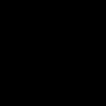

In [117]:
%% ================= Part 9: Visualize Weights =================
%  You can now "visualize" what the neural network is learning by 
%  displaying the hidden units to see what features they are capturing in 
%  the data.

fprintf('\nVisualizing Neural Network... \n')

displayData(Theta1(:, 2:end));

% fprintf('\nProgram paused. Press enter to continue.\n');
% pause;

In [118]:
function p = predict(Theta1, Theta2, X)
%PREDICT Predict the label of an input given a trained neural network
%   p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the
%   trained weights of a neural network (Theta1, Theta2)

% Useful values
m = size(X, 1);
num_labels = size(Theta2, 1);

% You need to return the following variables correctly 
p = zeros(size(X, 1), 1);

h1 = sigmoid([ones(m, 1) X] * Theta1');
h2 = sigmoid([ones(m, 1) h1] * Theta2');
[dummy, p] = max(h2, [], 2);

% =========================================================================


end

In [119]:
%% ================= Part 10: Implement Predict =================
%  After training the neural network, we would like to use it to predict
%  the labels. You will now implement the "predict" function to use the
%  neural network to predict the labels of the training set. This lets
%  you compute the training set accuracy.

pred = predict(Theta1, Theta2, X);
% 
fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);


Training Set Accuracy: 10.000000
